In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler

In [585]:
def plot_dendogram_from_dataset(cluster_df):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = dendrogram(linkage(cluster_df, method='ward'))

In [586]:
def plot_silhoette_from_dataset(dataset, n):
    model = KMeans(n)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(dataset)
    visualizer.show()

In [587]:
def plot_elbow_from_dataset(dataset, max_clusters):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,max_clusters), metric='calinski_harabasz', timings=True)
    visualizer.fit(dataset)
    visualizer.show()

In [588]:
def plot_elbow(distortions, n):
    plt.plot(range(1, n), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    #plt.savefig('images/11_03.png', dpi=300)
    plt.show()

In [589]:
def plot_silhouette(silhouette_avg, yticks, cluster_labels):
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()

In [590]:
def plot_dendrogram(row_clusters, labels):
    row_dendr = dendrogram(row_clusters, 
                           labels=labels)
    
    plt.tight_layout()
    plt.ylabel('Euclidean distance')
    plt.show()

In [591]:
def plot_dbscan(X, y_db, n):
    
    for i in range(n):
        plt.scatter(X[y_db == i, 0], X[y_db == i, 1],
                    marker='o', s=40,
                    edgecolor='black', 
                    label='Cluster {}'.format(i))
    plt.legend()
    plt.tight_layout()
    #plt.savefig('images/11_16.png', dpi=300)
    plt.show()

In [592]:
def plot_kmeans(X, y_km, km, n):
    for i in range(n):
        plt.scatter(X[y_km == i, 0],
                    X[y_km == i, 1],
                    s=50, edgecolor='black',
                    label='Cluster {}'.format(i))

    plt.scatter(km.cluster_centers_[:, 0],
                km.cluster_centers_[:, 1],
                s=250, marker='*',
                c='red', edgecolor='black',
                label='Centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    #plt.savefig('images/11_02.png', dpi=300)
    plt.show()

In [593]:
def compute_elbow_or_silhouette(metric, X, n=0):
    
    if (metric == 'elbow'):
        distortions = []
        for i in range(1, n):
            km = KMeans(n_clusters=i, 
                        init='k-means++', 
                        n_init=10, 
                        max_iter=300, 
                        random_state=0)
            km.fit(X)
            distortions.append(km.inertia_)

        plot_elbow(distortions, n)
        
    elif (metric == 'silhouette'):
        km = KMeans(n_clusters=n, 
                    init='k-means++', 
                    n_init=10, 
                    max_iter=300,
                    tol=1e-04,
                    random_state=0)
        y_km = km.fit_predict(X)

        cluster_labels = np.unique(y_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        for i, c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[y_km == c]
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)
            color = cm.jet(float(i) / n_clusters)
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                     edgecolor='none', color=color)

            yticks.append((y_ax_lower + y_ax_upper) / 2.)
            y_ax_lower += len(c_silhouette_vals)

        silhouette_avg = np.mean(silhouette_vals)
        plt.axvline(silhouette_avg, color="red", linestyle="--") 

        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')

        plt.tight_layout()
        #plt.savefig('images/11_04.png', dpi=300)
        plt.show()

In [594]:
def compute_kmeans(n, X):
    km = KMeans(n_clusters=n, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

    y_km = km.fit_predict(X)
    print(y_km)
    
    X = X.values
    
    plot_kmeans(X, y_km, km, np.unique(y_km).shape[0])

In [595]:
def compute_hierarchy(X):
    
    '''
    alfa = "abcdefghijklmnopqrstuvwxyz"
    
    variables = []
    labels = []
    alfa_counter = 0
    
    for i in range(X.shape[1]):
        if i%3 == 0 and alfa_counter < 26:
            variables.append(alfa[alfa_counter])
            alfa_counter += 1
        labels.append('ID_{}'.format(i))

    df = pd.DataFrame(X, columns=variables, index=labels)
    
    row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                            columns=labels,
                            index=labels)
    
    row_clusters = linkage(df.values, method='complete', metric='euclidean')
    pd.DataFrame(row_clusters,
                 columns=['row label 1', 'row label 2',
                          'distance', 'no. of items in clust.'],
                 index=['cluster %d' % (i + 1)
                        for i in range(row_clusters.shape[0])])'''
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap=plt.cm.jet)
    plt.title("Hierarchical")
    plt.show()
    #plot_dendrogram(row_clusters, labels)
    

In [596]:
def compute_agglomerative_clustering(n, X):
    ac = AgglomerativeClustering(n_clusters=n,
                                 affinity='euclidean', 
                                 linkage='complete')
    labels = ac.fit_predict(X)
    print('Cluster labels: %s' % labels)
    
    X = X.values
    
    '''plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c='lightblue',
                edgecolor='black',
                marker='o', s=40, label='Cluster 1')
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='red',
                edgecolor='black',
                marker='s', s=40, label='Cluster 2')'''
    
    for i in range(n):
        plt.scatter(X[labels == i, 0], X[labels == i, 1],
                    edgecolor='black', s=40, label='Cluster {}'.format(i))

    plt.legend()
    plt.tight_layout()
    
    plt.show()

In [597]:
def compute_dbscan(X):
    '''db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
    y_db = db.fit_predict(X)
    labels = db.labels_
    
    X = X.values
    
    plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
                c='lightblue', marker='o', s=40,
                edgecolor='black', 
                label='Cluster 1')
    plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
                c='red', marker='s', s=40,
                edgecolor='black', 
                label='Cluster 2')
    plt.legend()
    plt.tight_layout()
    #plt.savefig('images/11_16.png', dpi=300)
    plt.show()

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #plot_dbscan(X.values, y_db, n_clusters_)'''
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=.5, min_samples=5)
    db.fit(X)
    y_pred = db.fit_predict(X)

    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    plt.show()

In [3]:
dataset1 = pd.read_csv('dataset1.txt', sep='\s+',header=None)
dataset1.info()
print('\n\n')
dataset2 = pd.read_csv('dataset2.txt', sep='\s+',header=None)
dataset2.info()
print('\n\n')
dataset3 = pd.read_csv('dataset3.txt', sep='\s+',header=None)
dataset3.info()
print('\n\n')
dataset4 = pd.read_csv('dataset4.txt', sep='\s+',header=None)
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2048 non-null   int64
 1   1       2048 non-null   int64
 2   2       2048 non-null   int64
 3   3       2048 non-null   int64
 4   4       2048 non-null   int64
 5   5       2048 non-null   int64
 6   6       2048 non-null   int64
 7   7       2048 non-null   int64
dtypes: int64(8)
memory usage: 128.1 KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2048 non-null   int64
 1   1       2048 non-null   int64
 2   2       2048 non-null   int64
 3   3       2048 non-null   int64
 4   4       2048 non-null   int64
 5   5       2048 non-null   int64
 6   6       2048 non-null   int64
 7   7       2048 non-null   int64
 8   8       2048 non-null   int64
 9   9   

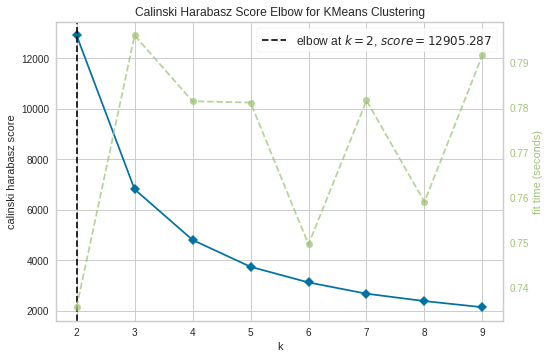

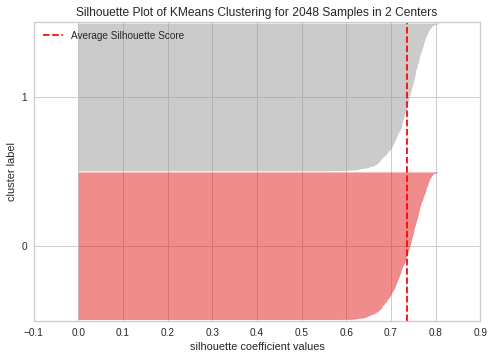

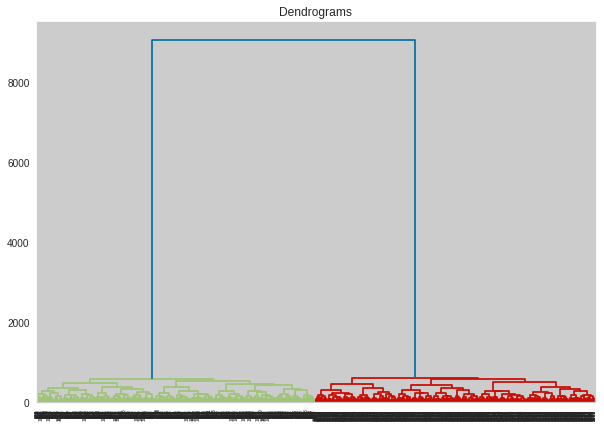

In [599]:
df1 = pd.DataFrame(dataset1)

plot_elbow_from_dataset(df1, 10)
plot_silhoette_from_dataset(df1, 2)
plot_dendogram_from_dataset(df1)


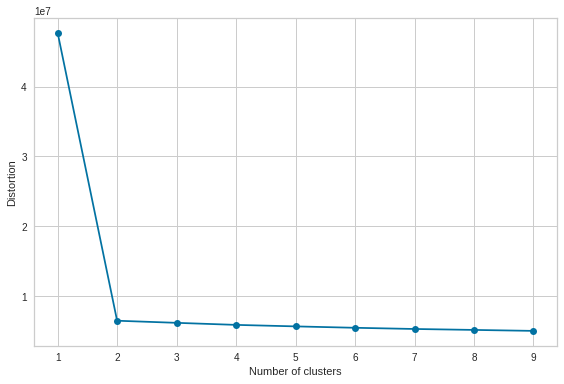

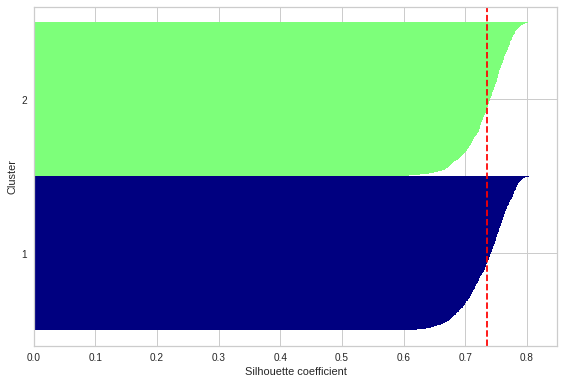

In [600]:
compute_elbow_or_silhouette('elbow', df1, 10)
compute_elbow_or_silhouette('silhouette', df1, 2)

[1 1 1 ... 0 0 0]


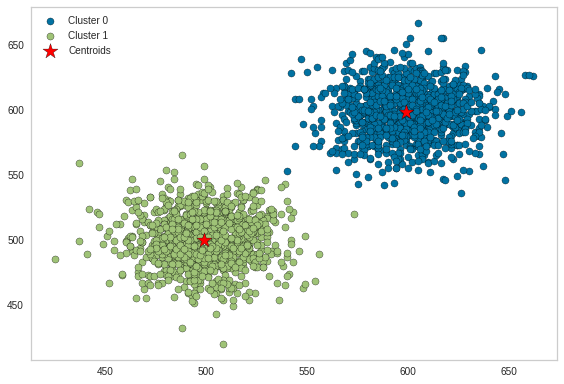

In [601]:
compute_kmeans(2, df1)

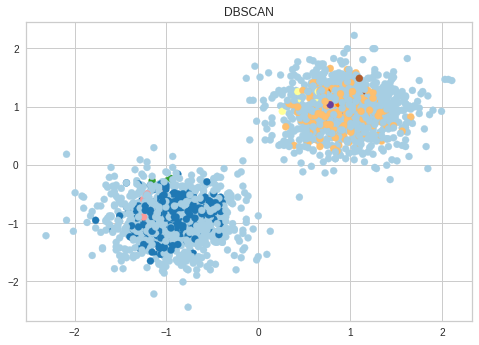

In [602]:
compute_dbscan(df1)

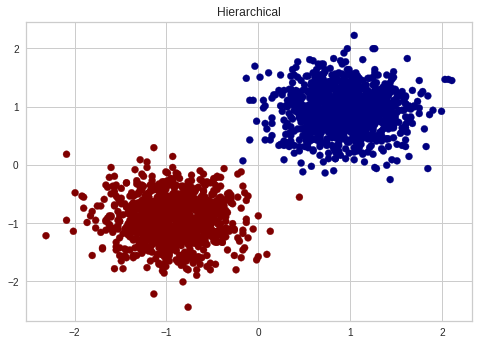

Cluster labels: [1 1 1 ... 0 0 0]


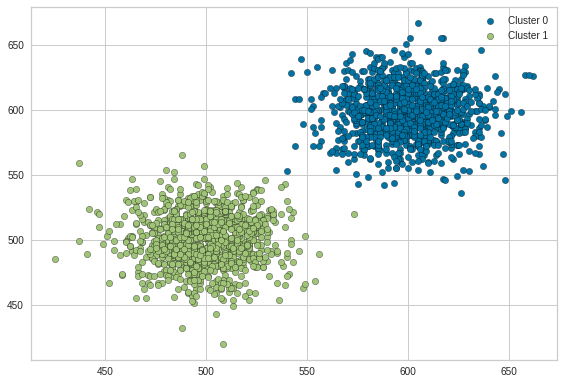

In [603]:
compute_hierarchy(df1)
compute_agglomerative_clustering(2, df1)

## Dataset 2

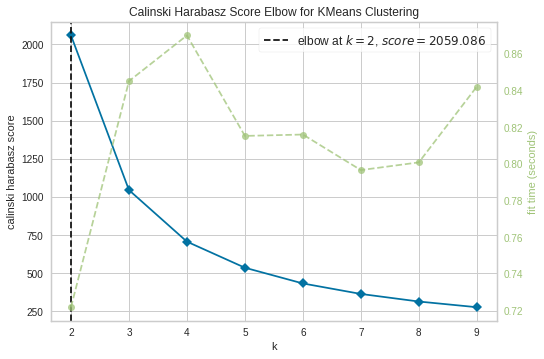

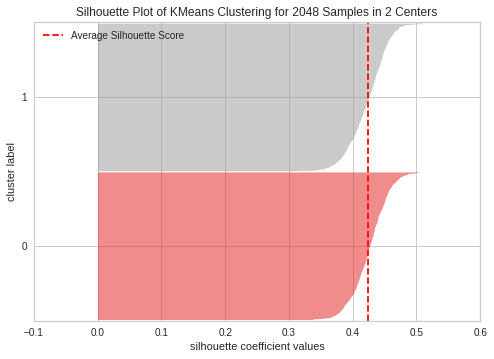

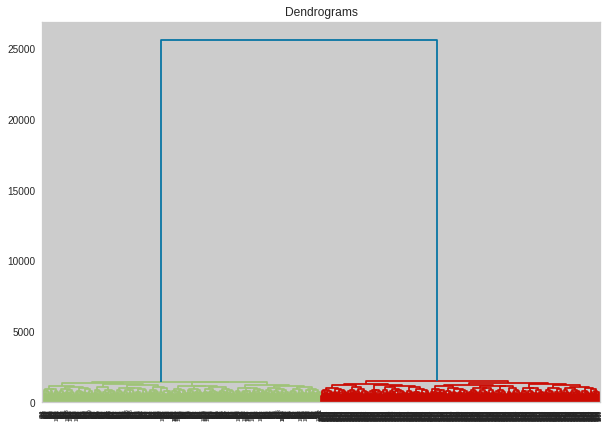

In [604]:
df2 = pd.DataFrame(dataset2)

plot_elbow_from_dataset(df2, 10)
plot_silhoette_from_dataset(df2, 2)
plot_dendogram_from_dataset(df2)


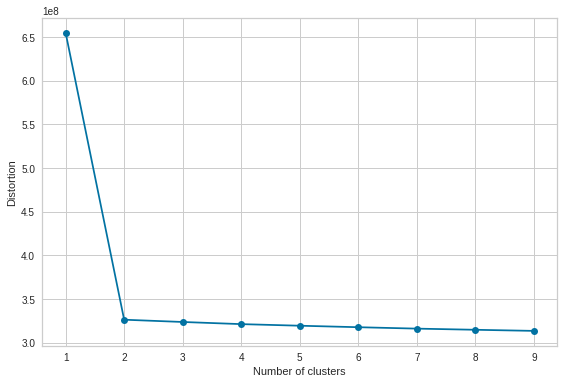

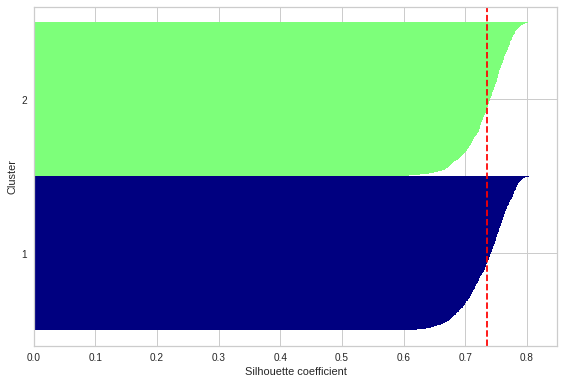

In [605]:
compute_elbow_or_silhouette('elbow', df2, 10)
compute_elbow_or_silhouette('silhouette', df1, 2)

[1 1 1 ... 0 0 0]


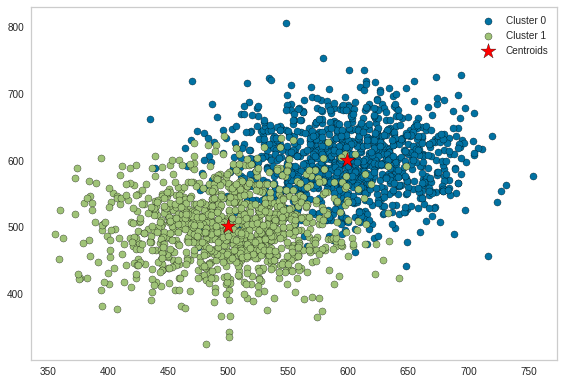

In [606]:
compute_kmeans(2, df2)

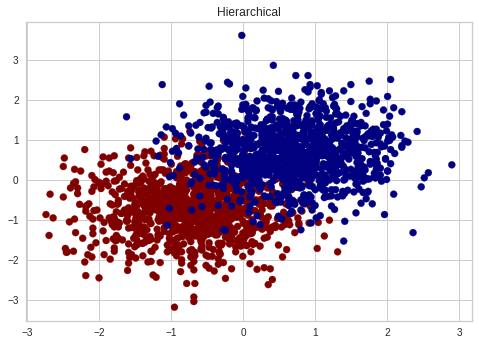

Cluster labels: [1 1 1 ... 0 0 0]


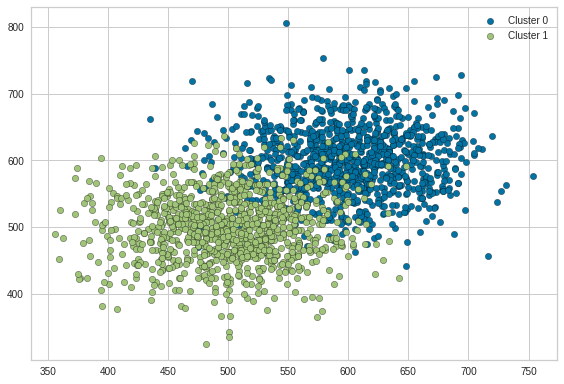

In [607]:
compute_hierarchy(df2)
compute_agglomerative_clustering(2, df2)

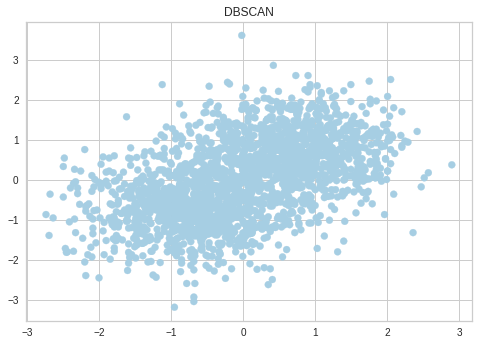

In [608]:
compute_dbscan(df2)

## Dataset 3

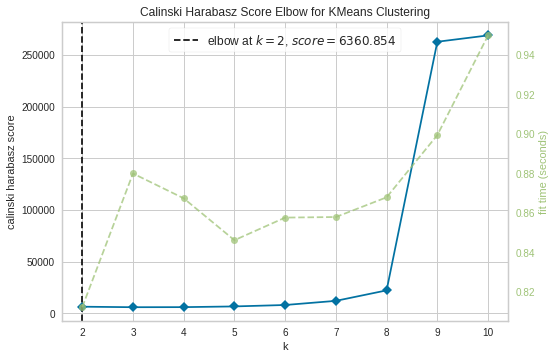

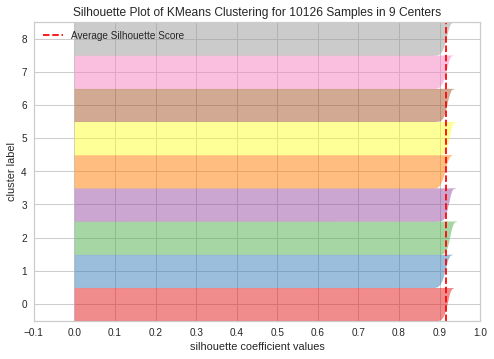

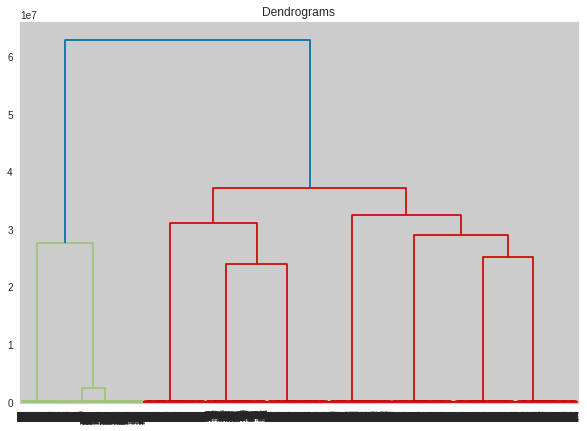

In [609]:
df3 = pd.DataFrame(dataset3)

plot_elbow_from_dataset(df3, 11)
plot_silhoette_from_dataset(df3, 9)
plot_dendogram_from_dataset(df3)

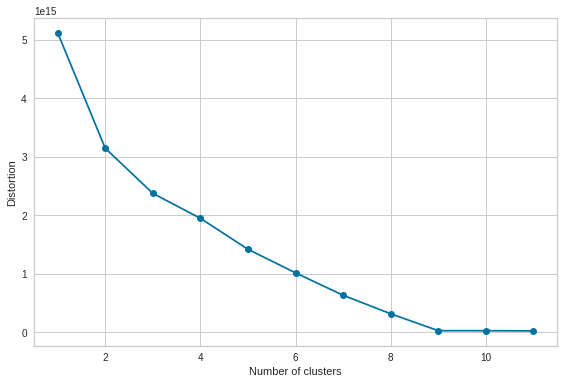

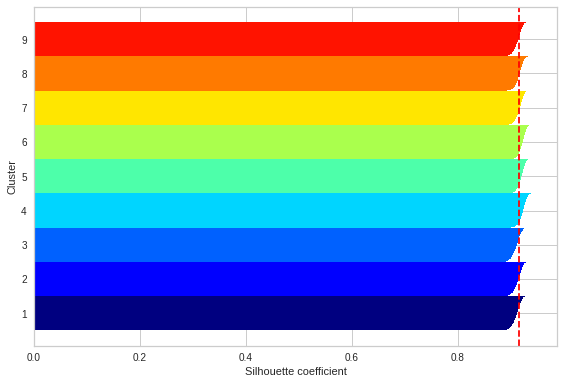

In [610]:
compute_elbow_or_silhouette('elbow', df3, 12)
compute_elbow_or_silhouette('silhouette', df3, 9)

[7 5 5 ... 7 7 7]


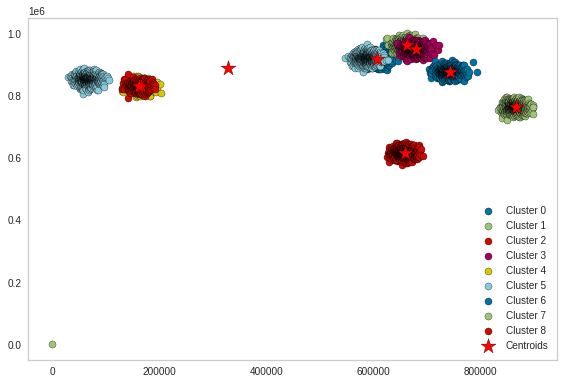

In [611]:
compute_kmeans(9, df3)

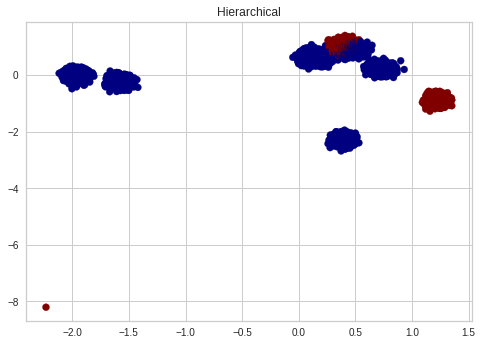

Cluster labels: [7 0 0 ... 2 2 2]


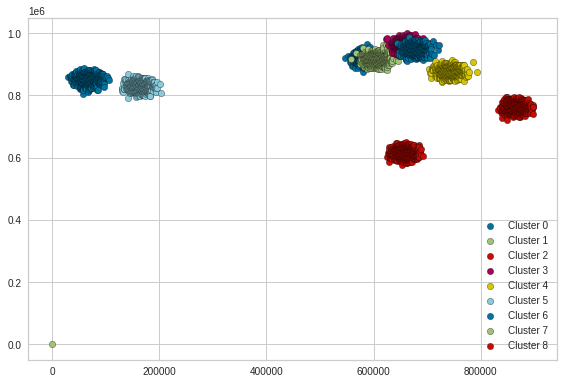

In [612]:
compute_hierarchy(df3)
compute_agglomerative_clustering(9, df3)

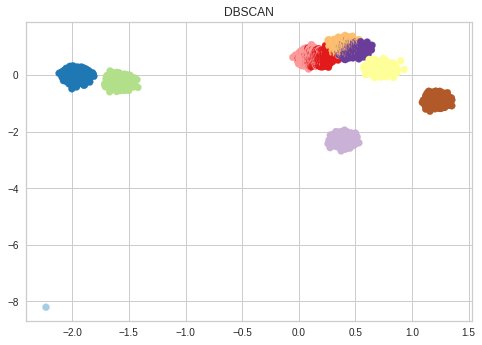

In [613]:
compute_dbscan(df3)

## Dataset 4

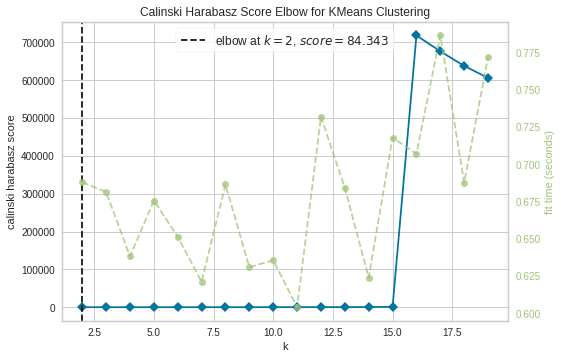

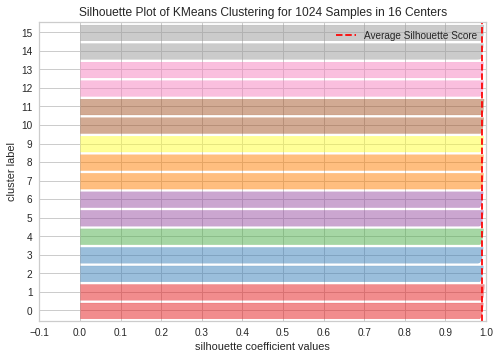

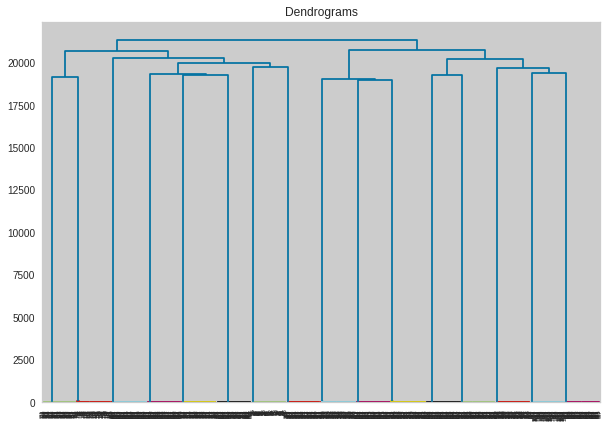

In [614]:
df4 = pd.DataFrame(dataset4)

plot_elbow_from_dataset(df4, 20)
plot_silhoette_from_dataset(df4, 16)
plot_dendogram_from_dataset(df4)

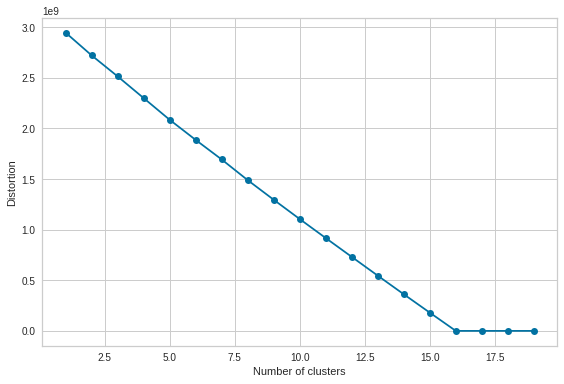

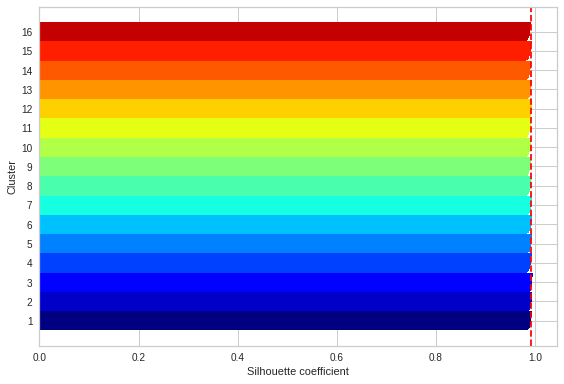

In [615]:
compute_elbow_or_silhouette('elbow', df4, 20)
compute_elbow_or_silhouette('silhouette', df4, 16)

[12 12 12 ...  0  0  0]


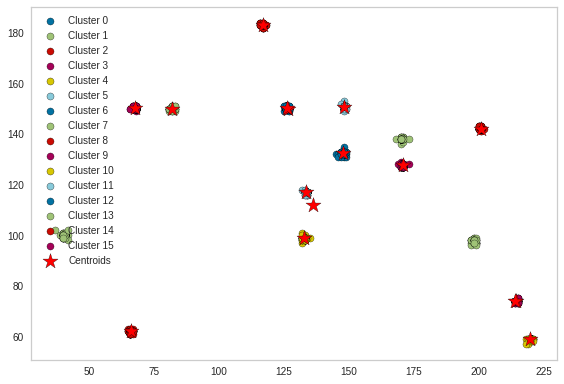

In [616]:
compute_kmeans(16, df4)

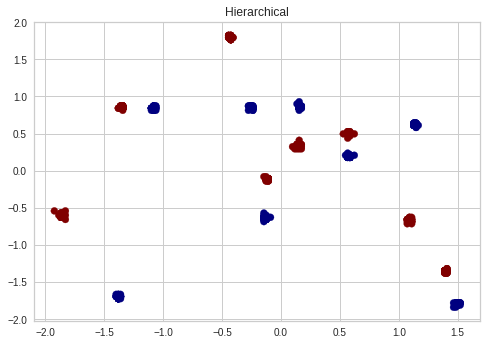

Cluster labels: [13 13 13 ...  9  9  9]


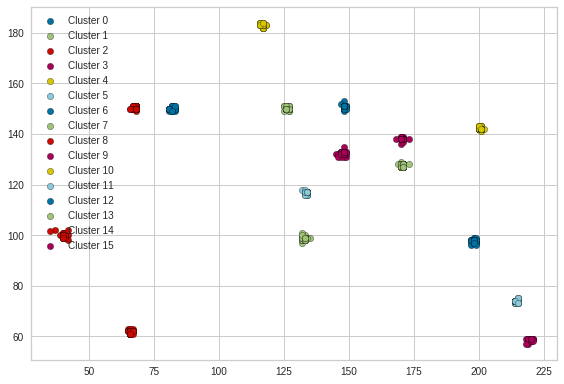

In [617]:
compute_hierarchy(df4)
compute_agglomerative_clustering(16, df4)

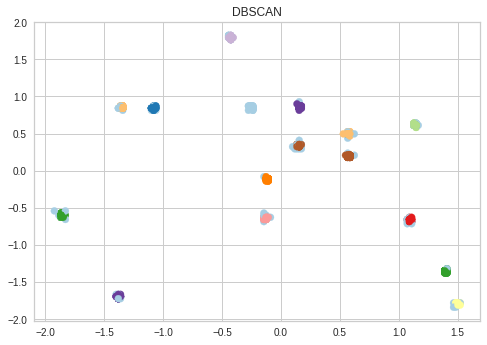

In [618]:
compute_dbscan(df4)

In [619]:
df4.shape[1]

1024